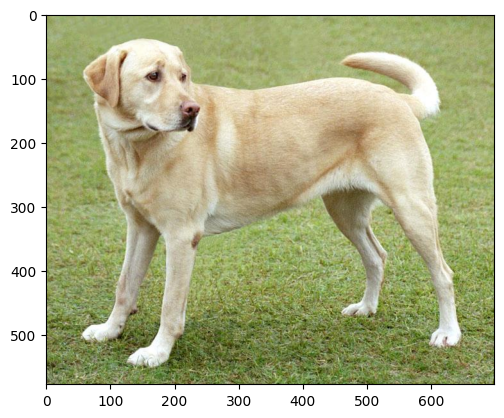

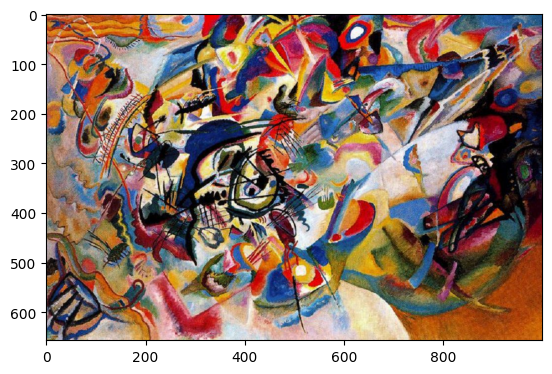

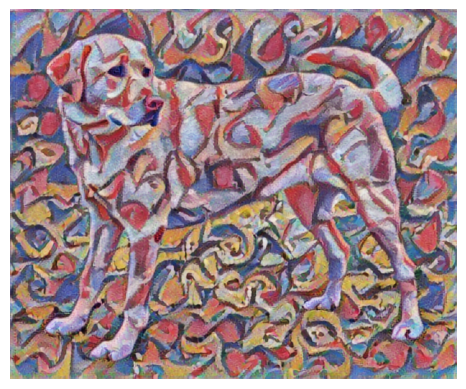

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Define function for style transfer
def style_transfer(content_image_path, style_image_path, output_image_path):
    # Load and preprocess images
    content_image = tf.keras.preprocessing.image.load_img(content_image_path)
    style_image = tf.keras.preprocessing.image.load_img(style_image_path)

    content_image = tf.keras.preprocessing.image.img_to_array(content_image)
    style_image = tf.keras.preprocessing.image.img_to_array(style_image)

    content_image = tf.image.convert_image_dtype(content_image, tf.float32)[tf.newaxis, ...] / 255.0
    style_image = tf.image.convert_image_dtype(style_image, tf.float32)[tf.newaxis, ...] / 255.0
    plt.imshow(tf.squeeze(content_image))
    plt.show()
    plt.imshow(tf.squeeze(style_image))
    plt.show()
    # Perform style transfer
    stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

    # Convert the stylized image to a NumPy array
    stylized_image = tf.squeeze(stylized_image)
    stylized_image = tf.clip_by_value(stylized_image, 0, 1)
    stylized_image = tf.image.convert_image_dtype(stylized_image, dtype=tf.uint8)
    stylized_image = tf.keras.preprocessing.image.array_to_img(stylized_image)

    # Save or display the stylized image
    stylized_image.save(output_image_path)
    plt.imshow(stylized_image)
    plt.axis('off')
    plt.show()

# Specify paths to content and style images
content_image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_image_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# Specify path to save the output stylized image
output_image_path = 'stylized_image.jpg'

# Perform style transfer
style_transfer(content_image_path, style_image_path, output_image_path)
